<a href="https://colab.research.google.com/github/Sriyansh-36-AI-NITJ/Machine-Learning-Lab/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Logistic Regression

In [14]:
import pandas as pd
from matplotlib import pyplot as plt

In [16]:
url = "https://raw.githubusercontent.com/Sriyansh-36-AI-NITJ/Machine-Learning-Lab/refs/heads/main/insurance_data.csv"
df = pd.read_csv(url)
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


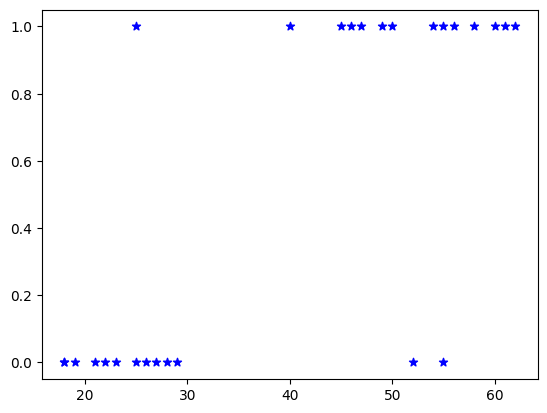

In [17]:
plt.scatter(df.age, df.bought_insurance, marker="*", color="blue")

In [18]:
# Suppose df is your DataFrame
train_size = 0.8
n_train = int(len(df) * train_size)

df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

train_df = df_shuffled.iloc[:n_train]
test_df = df_shuffled.iloc[n_train:]

X_train = train_df[["age"]]
y_train = train_df["bought_insurance"]

X_test = test_df[["age"]]
y_test = test_df["bought_insurance"]

In [21]:
X_train.shape, X_test.shape

((21, 1), (6, 1))

In [22]:
import numpy as np


def Logistic_reg(x, y, lr=0.01, epochs=1000):
    x = x.reshape(-1, 1)  # ensure 2D
    X = np.c_[np.ones((x.shape[0], 1)), x]
    print(x[:5], X[:5])
    y = y.reshape(-1, 1)


    # initialize weights
    theta = np.zeros((X.shape[1], 1))
    print(theta)

    for _ in range(epochs):
        z = X @ theta
        h = 1 / (1 + np.exp(-z))
        gradient = X.T @ (h - y) / len(y)
        theta -= lr * gradient

    return theta  # coefficients [bias, slope]

In [23]:
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

params = Logistic_reg(X_train_np, y_train_np)
print("Bias and coefficient:", params.ravel())

[[62]
 [29]
 [61]
 [26]
 [22]] [[ 1. 62.]
 [ 1. 29.]
 [ 1. 61.]
 [ 1. 26.]
 [ 1. 22.]]
[[0.]
 [0.]]
Bias and coefficient: [-1.15465345  0.04225014]


In [24]:
def predict(x, theta):
    X = np.c_[np.ones((x.shape[0],1)), x]
    return 1 / (1 + np.exp((X @ theta)))

preds = predict(X_train_np, params)
print(preds[:5]), X_train_np[:5], y_train_np[:5]  # first 5 probabilities

[[0.18772589]
 [0.4823572 ]
 [0.19425355]
 [0.51403379]
 [0.55605103]]


(None,
 array([[62],
        [29],
        [61],
        [26],
        [22]]),
 array([1, 0, 1, 0, 0]))

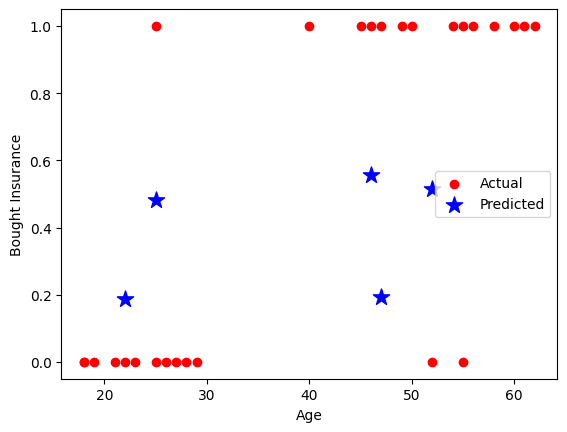

In [25]:
# Plot actual data
plt.scatter(df.age, df.bought_insurance, color="red", marker="o", label="Actual")

# Plot predictions (only first 5, as you tried)
plt.scatter(df.age[:5], preds[:5], color="blue", marker="*", s=150, label="Predicted")

plt.xlabel("Age")
plt.ylabel("Bought Insurance")
plt.legend()
plt.show()